<a href="https://colab.research.google.com/github/SuryanshNaugraiya/Bitcoin_Prediction_System/blob/master/Bitcoin_Price_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Part-1 -Data Collection

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving bitcoin_modified_data.csv to bitcoin_modified_data.csv
User uploaded file "bitcoin_modified_data.csv" with length 101228 bytes


In [2]:
# Part-2 -Data Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bitcoin_modified_data.csv')

In [3]:
df.head()

,_id,time,high,low,open,close
0,5f40eeecb46eef21e8aac750,1468454400,661.88,646.31,661.15,657.25
1,5f40eeecb46eef21e8aac751,1468540800,667.46,656.50,657.25,664.20
2,5f40eeecb46eef21e8aac752,1468627200,665.41,655.72,664.20,660.69
3,5f40eeecb46eef21e8aac753,1468713600,680.94,660.13,660.69,676.33
4,5f40eeecb46eef21e8aac754,1468800000,680.42,664.61,676.33,670.38


In [4]:
df.tail()

,_id,time,high,low,open,close
1496,5f40eeecb46eef21e8aacd28,1597708800,12397.40,11855.24,12301.19,11956.69
1497,5f40eeecb46eef21e8aacd29,1597795200,12021.80,11592.20,11956.69,11760.37
1498,5f40eeecb46eef21e8aacd2a,1597881600,11888.72,11679.03,11760.37,11863.43
1499,5f40eeecb46eef21e8aacd2b,1597968000,11882.67,11494.52,11863.43,11527.35
1500,5f40eeecb46eef21e8aacd2c,1598054400,11621.23,11379.06,11527.35,11588.09


In [5]:
df1=df.reset_index()['high']


In [6]:
df1


0         661.88
1         667.46
2         665.41
3         680.94
4         680.42
          ...   
1496    12397.40
1497    12021.80
1498    11888.72
1499    11882.67
1500    11621.23
Name: high, Length: 1501, dtype: float64

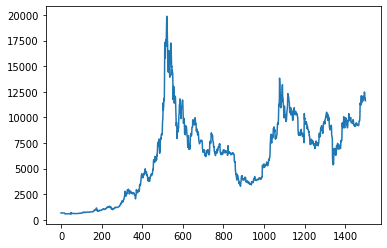

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
### Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.00460265],
       [0.00489181],
       [0.00478558],
       ...,
       [0.58637776],
       [0.58606425],
       [0.57251642]])

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(975, 526)

In [13]:
train_data

array([[4.60265443e-03],
       [4.89181016e-03],
       [4.78557911e-03],
       [5.59034406e-03],
       [5.56339765e-03],
       [5.19132989e-03],
       [5.14210087e-03],
       [4.84258113e-03],
       [4.99441380e-03],
       [4.41040214e-03],
       [4.72339508e-03],
       [4.63530104e-03],
       [4.38915593e-03],
       [4.45755836e-03],
       [4.39951994e-03],
       [4.37050073e-03],
       [4.37827373e-03],
       [4.24198707e-03],
       [2.84129185e-03],
       [2.10855673e-03],
       [0.00000000e+00],
       [6.13030870e-04],
       [3.58076358e-04],
       [1.22398894e-03],
       [1.18926952e-03],
       [1.09754808e-03],
       [9.40015214e-04],
       [1.42297783e-03],
       [1.35198440e-03],
       [9.36906013e-04],
       [8.81458589e-04],
       [6.60187091e-04],
       [9.89762436e-05],
       [5.34782636e-04],
       [4.16632984e-04],
       [3.35275548e-04],
       [2.48736110e-04],
       [5.41001038e-04],
       [6.35313480e-04],
       [9.76289230e-04],


In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(874, 100)
(874,)


(None, None)

In [17]:
print(X_test.shape), print(y_test.shape)

(425, 100)
(425,)


(None, None)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
###Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
14/14 [==============================] - 3s 232ms/step - loss: 0.0254 - val_loss: 0.0198
Epoch 2/100
14/14 [==============================] - 2s 162ms/step - loss: 0.0072 - val_loss: 0.0040
Epoch 3/100
14/14 [==============================] - 2s 160ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 4/100
14/14 [==============================] - 2s 162ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 5/100
14/14 [==============================] - 2s 158ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 6/100
14/14 [==============================] - 2s 160ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 7/100
14/14 [==============================] - 2s 158ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 8/100
14/14 [==============================] - 2s 160ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 9/100
14/14 [==============================] - 2s 159ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 10/100
14/14 [==============================] - 2s 159ms/step - loss: 0.0018 - val_lo

In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.3.0'

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

6791.029548097007

In [28]:
## Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

9724.293508644107

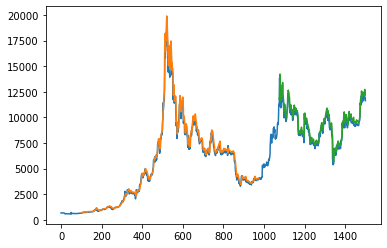

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

526

In [31]:
x_input=test_data[426:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.48030165471696945,
 0.46699375465084714,
 0.4825734445183744,
 0.4855888516475659,
 0.48283979943578376,
 0.47984719311664287,
 0.4660563304376305,
 0.45041860214451995,
 0.45281786920211686,
 0.45259867050549407,
 0.4355146453748558,
 0.4372817081537771,
 0.4482038143682414,
 0.4687784362375348,
 0.4678503396284298,
 0.47480976869614616,
 0.4731401275601684,
 0.5071086707335021,
 0.500539446437788,
 0.47120931350906553,
 0.4821765031434026,
 0.4805519454272977,
 0.47442992792871236,
 0.478462043906069,
 0.47820190739140095,
 0.482536134101928,
 0.48800677391338604,
 0.48698954686499235,
 0.465088332410937,
 0.46217967452880065,
 0.4615350334446428,
 0.4625263504816154,
 0.46700774605701456,
 0.46518834505502255,
 0.4615599070556072,
 0.45844811468392904,
 0.45710338509117227,
 0.4583563932434982,
 0.4768338587883651,
 0.4740003399393499,
 0.47111241006635046,
 0.4540776139574123,
 0.4516767922991301,
 0.44654401903660373,
 0.4465165544244973,
 0.44882720924303393,
 0.44709952968147

In [34]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5907919]
101
1 day input [0.46699375 0.48257344 0.48558885 0.4828398  0.47984719 0.46605633
 0.4504186  0.45281787 0.45259867 0.43551465 0.43728171 0.44820381
 0.46877844 0.46785034 0.47480977 0.47314013 0.50710867 0.50053945
 0.47120931 0.4821765  0.48055195 0.47442993 0.47846204 0.47820191
 0.48253613 0.48800677 0.48698955 0.46508833 0.46217967 0.46153503
 0.46252635 0.46700775 0.46518835 0.46155991 0.45844811 0.45710339
 0.45835639 0.47683386 0.47400034 0.47111241 0.45407761 0.45167679
 0.44654402 0.44651655 0.44882721 0.44709953 0.45221313 0.4505637
 0.44326796 0.44683628 0.44460595 0.45596594 0.45630795 0.46112514
 0.45957157 0.45312723 0.45234527 0.45430251 0.45411752 0.45117155
 0.45080881 0.44790481 0.44617143 0.44735604 0.44903293 0.44833129
 0.45925443 0.46528214 0.47168865 0.47025479 0.47527563 0.49578755
 0.56092169 0.55345494 0.5583851  0.5497949  0.56385626 0.58565487
 0.59768333 0.56500563 0.56183787 0.58134604 0.58747064 0.58761626
 0.58237104 0.58193212 0.59599504 0

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [36]:
len(df1)

1501

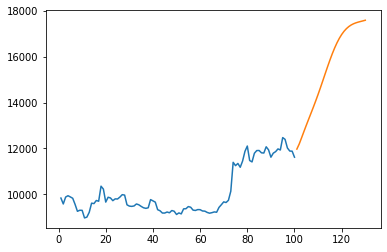

In [38]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[1401:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

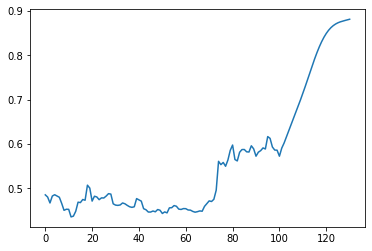

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1400:])

In [40]:
df3=scaler.inverse_transform(df3).tolist()

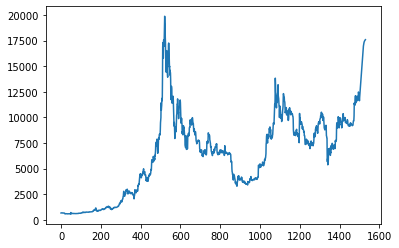

In [41]:
plt.plot(df3)